In [2]:
!pip install "ultralytics<=8.3.40"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
yolo_m = YOLO("/content/drive/MyDrive/nlp_project_elte/od/od/saved_model.pt")

In [6]:
results = yolo_m.predict(source="/content/20250405_103447_anonimized_jpg.rf.94fa97b5d2592ae8b8d857fe040e2523.jpg", save=False, conf=0.25)


image 1/1 /content/20250405_103447_anonimized_jpg.rf.94fa97b5d2592ae8b8d857fe040e2523.jpg: 640x640 1 Automobile, 32.3ms
Speed: 9.0ms preprocess, 32.3ms inference, 457.6ms postprocess per image at shape (1, 3, 640, 640)


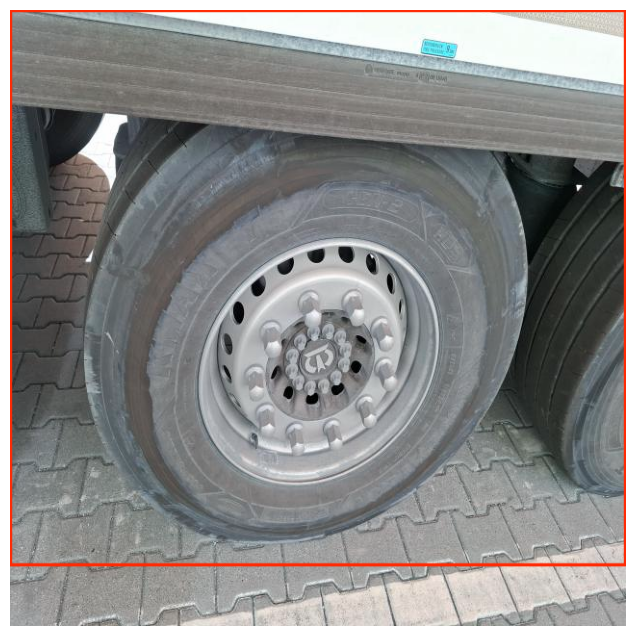

In [9]:
import matplotlib.pyplot as plt
result_image = results[0].plot(labels=False)

# Display using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(result_image)
plt.axis('off')
plt.show()

array([[[255,  42,   4],
        [255,  42,   4],
        [255,  42,   4],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       [[255,  42,   4],
        [255,  42,   4],
        [255,  42,   4],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       [[255,  42,   4],
        [255,  42,   4],
        [189, 109,  95],
        ...,
        [224, 140, 121],
        [255,  42,   4],
        [255,  42,   4]],

       ...,

       [[157, 159, 160],
        [159, 161, 162],
        [159, 161, 162],
        ...,
        [167, 167, 167],
        [169, 169, 169],
        [172, 172, 172]],

       [[158, 160, 161],
        [163, 165, 166],
        [163, 165, 166],
        ...,
        [164, 164, 164],
        [166, 166, 166],
        [169, 169, 169]],

       [[158, 160, 161],
        [166, 168, 169],
        [168, 170, 171],
        ...,
        [167, 167, 167],
        [169, 169, 169],
        [171, 171, 171]]], dtype=uint8)
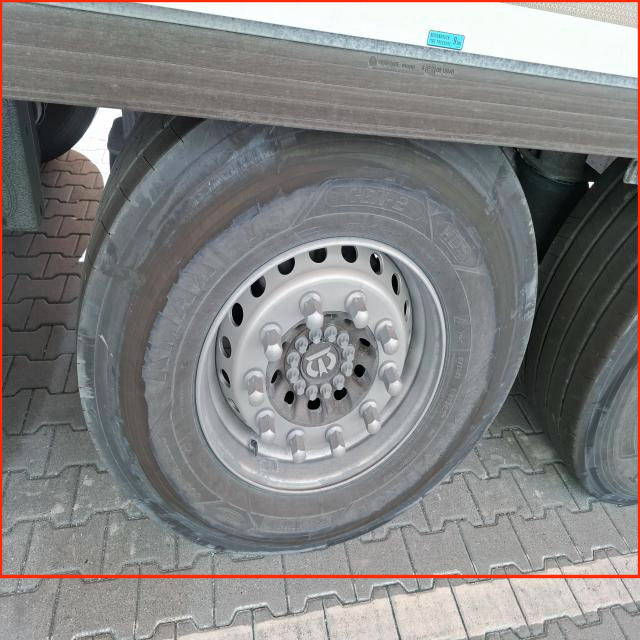

In [13]:
result_image = results[0].plot(labels=False)
result_image

In [16]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


# Initialize processor and model
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-Instruct",
    torch_dtype=torch.bfloat16,
    _attn_implementation= "eager",
).to(DEVICE)

# Create input messages
messages = [
    {
        "role": "system",
        "content": [
            {"type": "text", "text": "You are helpful assistant. You describe the detected object in the given image."}
        ]
    },
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you describe detected image?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[result_image], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=100)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])


System: You are helpful assistant. You describe the detected object in the given image.
User:<image>Can you describe detected image?
Assistant: The image shows a close-up of a single wheel of a vehicle, which appears to be a semi-truck. The wheel is made of a thick, black rubber tire, with a silver rim and hubcap. The tire has a large, flat area, which is likely the flat part of the tire. The rim is round and has several small holes around it, which are likely for attaching lug nuts. The hubcap is also round and has a design with several small circles and
